#  SGO Geostatistics Library Based on The Work by Michael Pyrcz




**Python wrappers of GSLIB: Geostatistical Library methods** (Deutsch and Journel, 1997). 

This notebook consists of different implementation of the geostatistcs methods, such as different types of kriging, variogram calculation and Sequential Guassian Simulation and finally Sequential Indicator Simulations.

1. generate a 2D model with sequential Gaussian simulation
2. calculate and visualize experimental semivariograms



## Mehrdad Yousefzadeh summer 2019, QRI



#### Load the required libraries


In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt                          
import random as rand
from scipy.io import loadmat
import h5py

#### Load the GSLIB wrappers and SciKit-GStat


In [5]:
#from GSLIB.GSLIB import ndarray2GSLIB, GSLIB2ndarray, Dataframe2GSLIB, GSLIB2Dataframe, hist, hist_st, locmap, locmap_st
#from GSLIB.GSLIB import pixelplt, pixelplt_st, locpix, locpix_st, locpix_log_st, affine, nscore, make_variogram
import GSLIB.GSLIB as gs
from skgstat import Variogram

#### Set the working directory

This is the working directory where the outputs and parameter files will be stored.  Also, make sure to place GSLIB executables in this directory or a location identified in the environmental variable *Path*.

In [6]:
os.chdir("C:/Users/mehrd/Downloads/Geostat Source Codes/GeostatGuy/SGO/Working")

#### The Model Parameters

Let's set the modeling parameters, the model grid, the random seed, the target distribution, and color bar.  We will use these for testing the GeostatPy functions. 

In [7]:
# Modeling parameters, the model grid, the random seed, the target distribution, and color bar
nx = 100; ny = 100; cell_size = 10                               # grid number of cells and cell size
xmin = 0.0; ymin = 0.0;                                          # grid origin
xmax = xmin + nx * cell_size; ymax = ymin + ny * cell_size       # calculate the extent of model
seed = rand.randint(7000,8000)                                   # random number seed  for stochastic simulation    
mean = 10.0; stdev = 2.0                                         # Porosity mean and standard deviation
vmin = 4; vmax = 16; cmap = plt.cm.jet                        # color min and max and using the plasma color map

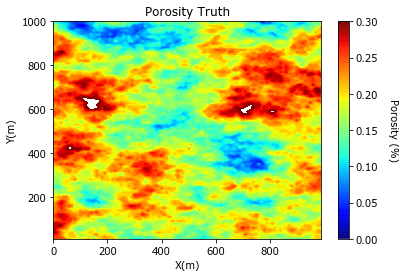

In [8]:
# Make a truth model / unconditional simulation
por_mean = 0.18; por_stdev = 0.05; por_cmin = 0.0; por_cmax = 0.3
var = gs.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=90.0,hmaj1=500.0,hmin1=250.0)
porosity_truth = gs.sgsim_uncond(1,nx,ny,cell_size,seed + 12,var,"Porosity")
porosity_truth = gs.affine(porosity_truth,por_mean,por_stdev)
gs.pixelplt_st(porosity_truth,xmin,xmax,ymin,ymax,cell_size,por_cmin,por_cmax,"Porosity Truth","X(m)","Y(m)","Porosity (%)",cmap)


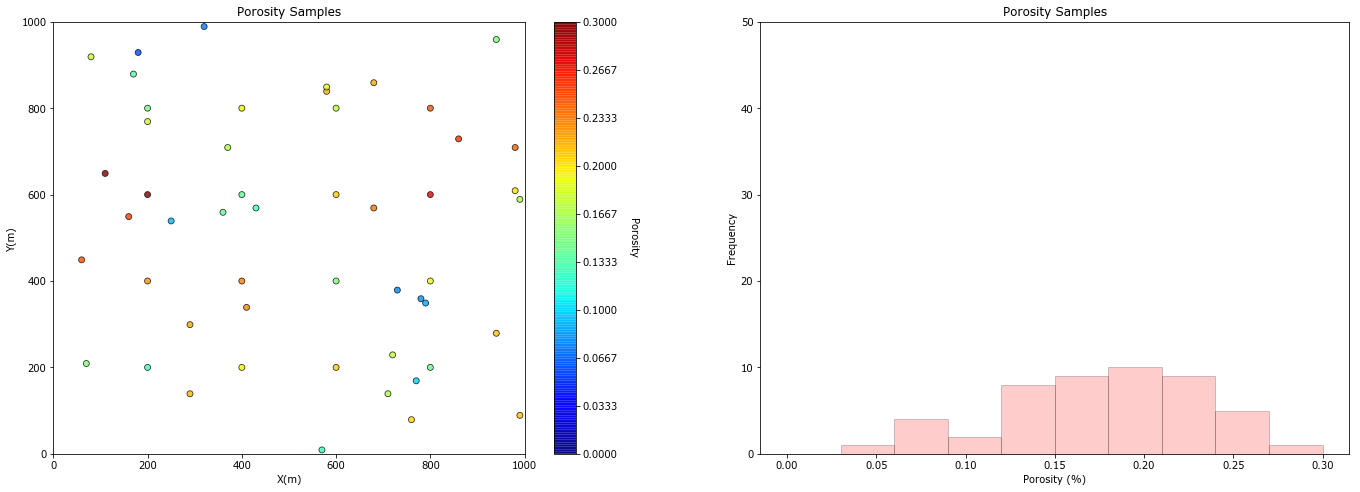

In [9]:
# Make a datset by sampling from the truth model, and display the histogram and location map
mx = 20; my = 20
sample_data1 = gs.regular_sample(porosity_truth,xmin,xmax,ymin,ymax,cell_size,mx,my,"Porosity")
nsamp_random = rand.randint(10,40)
sample_data2 = gs.random_sample(porosity_truth,xmin,xmax,ymin,ymax,cell_size,nsamp_random,'Porosity')
sample_data = pd.concat([sample_data1,sample_data2],ignore_index = True)

plt.subplot(121)
gs.locmap_st(sample_data,'X','Y','Porosity',xmin,xmax,ymin,ymax,por_cmin,por_cmax,'Porosity Samples','X(m)','Y(m)','Porosity',cmap)

plt.subplot(122)
gs.hist_st(sample_data['Porosity'],por_cmin,por_cmax,log=False,cumul=False,bins=10,weights=None,xlabel="Porosity (%)",title="Porosity Samples")
plt.ylim(0.0,50)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
plt.savefig('PorositySamples.tif',dpi=600,bbox_inches="tight")
plt.show()


In [10]:
# Normal score transform
sample_data['NPor'] = gs.nscore(sample_data['Porosity'].values)
sample_data.head()


,X,Y,Porosity,NPor
0,200.0,800.0,0.148787,-0.57007
1,200.0,600.0,0.303057,1.88951
2,200.0,400.0,0.225075,0.75378
3,200.0,200.0,0.129064,-0.89171
4,400.0,800.0,0.193816,0.14799


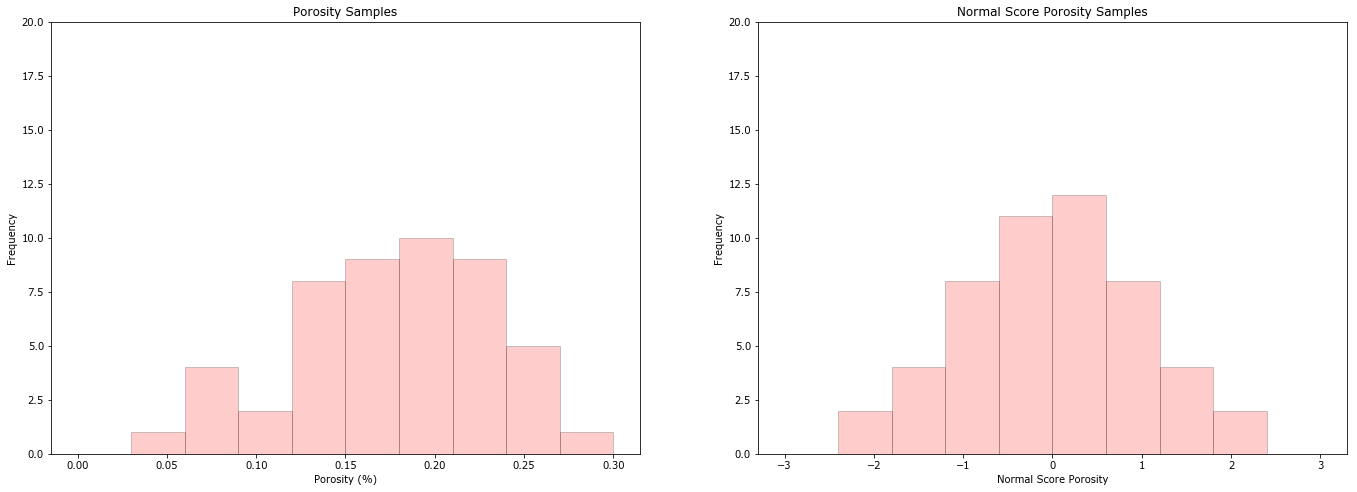

In [11]:
# Check the porosity normal score transformed distribution
plt.subplot(121)
gs.hist_st(sample_data['Porosity'],por_cmin,por_cmax,log=False,cumul=False,bins=10,weights=None,xlabel="Porosity (%)",title="Porosity Samples")
plt.ylim(0.0,20)

plt.subplot(122)
gs.hist_st(sample_data['NPor'],-3,3,log=False,cumul=False,bins=10,weights=None,xlabel="Normal Score Porosity",title="Normal Score Porosity Samples")
plt.ylim(0.0,20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
#plt.savefig('F4_Eg_EUR_Real_Pad.tif',dpi=600,bbox_inches="tight")
plt.show()

C:\Anaconda3\envs\cs231n\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Anaconda3\envs\cs231n\lib\site-packages\matplotlib\font_manager.py:1250: UserWarning: findfont: Could not match :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning C:\WINDOWS\Fonts\NirmalaB.ttf.
  UserWarning)
C:\Anaconda3\envs\cs231n\lib\site-packages\matplotlib\font_manager.py:1250: UserWarning: findfont: Could not match :family=DejaVu Sans:style=italic:variant=normal:weight=normal:stretch=normal:size=10.0. Returning C:\WINDOWS\Fonts\NirmalaB.ttf.
  UserWarning)
C:\Anaconda3\envs\cs231n\lib\site-packages\matplotlib\font_manager.py:1250: UserWarning: findfont: Could not match :family=DejaVu Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=10.0. Returning C:\WINDOWS\Fonts\NirmalaB.ttf.
  UserWarning)
C:\Ana

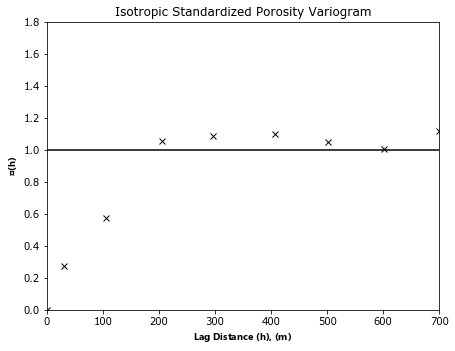

In [12]:
# Calculate sample porosity data isotropic variogram
lag_dist = 100.0; nlag = 7; azi = 0; atol = 90.0; bstand = 1

lag, por_gamma, por_npair = gs.gamv_2d(sample_data,"X","Y","NPor",nlag,lag_dist,azi,atol,bstand)

plt.subplot(121)
plt.plot(lag,por_gamma,'x',color = 'black',label = 'Porosity')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic Standardized Porosity Variogram')
plt.xlim([0,700])
plt.ylim([0,1.8])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

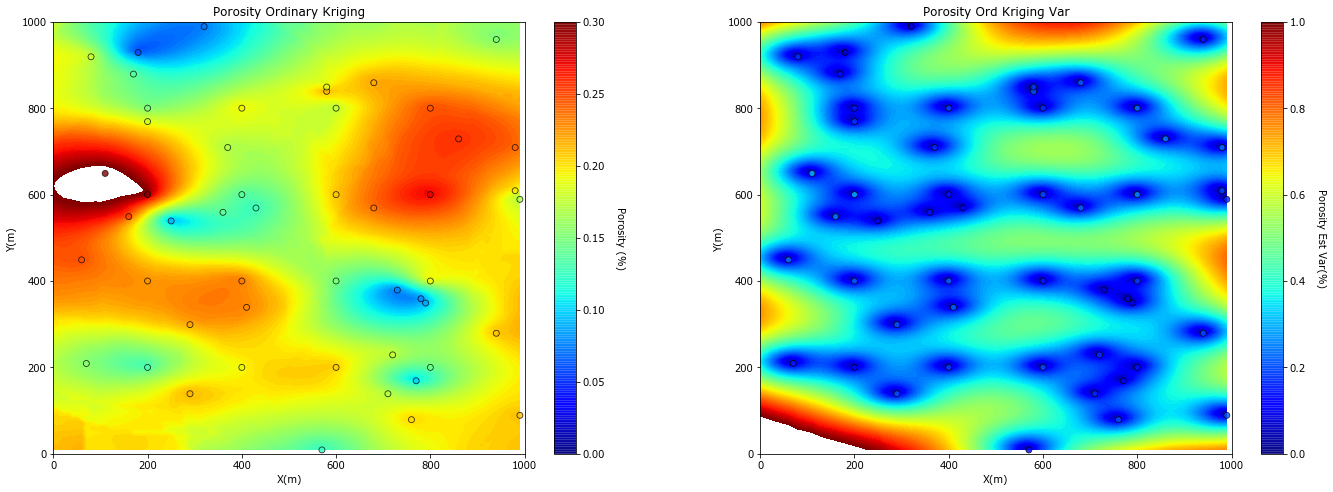

In [13]:
# Kriging estimation map
porosity_est,porosity_var = gs.kb2d(sample_data,'X','Y','Porosity',nx,ny,cell_size,var,"Porosity_Krige")

plt.subplot(121)
gs.locpix_st(porosity_est,xmin,xmax,ymin,ymax,cell_size,por_cmin,por_cmax,sample_data,'X','Y','Porosity','Porosity Ordinary Kriging','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(122)
gs.locpix_st(porosity_var,xmin,xmax,ymin,ymax,cell_size,0.0,1.0,sample_data,'X','Y','Porosity','Porosity Ord Kriging Var','X(m)','Y(m)','Porosity Est Var(%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
plt.savefig('PorosityKriged.tif',dpi=600,bbox_inches="tight")
plt.show()

In [36]:
# Conditional simulation - make 1 structure variogram, simulate, transform distribution and visualize
var = gs.make_variogram(nug=0.1,nst=1,it1=1,cc1=0.9,azi1=90,hmaj1=500,hmin1=250)
print(var)
#cond_por_sim = gs.sgsim(1,sample_data,'X','Y','Porosity',nx,ny,cell_size,seed+5,var,'simulation_cond.out')
#gs.locpix(cond_por_sim,xmin,xmax,ymin,ymax,cell_size,por_cmin,por_cmax,sample_data,'X','Y','Porosity','Porosity Conditional Simulation','X(m)','Y(m)','Porosity (%)',cmap,"Cond_Por_Sim")

{'nug': 0.1, 'nst': 1, 'it1': 1, 'cc1': 0.9, 'azi1': 90, 'hmaj1': 500, 'hmin1': 250, 'it2': 1, 'cc2': 0, 'azi2': 0, 'hmaj2': 0, 'hmin2': 0}


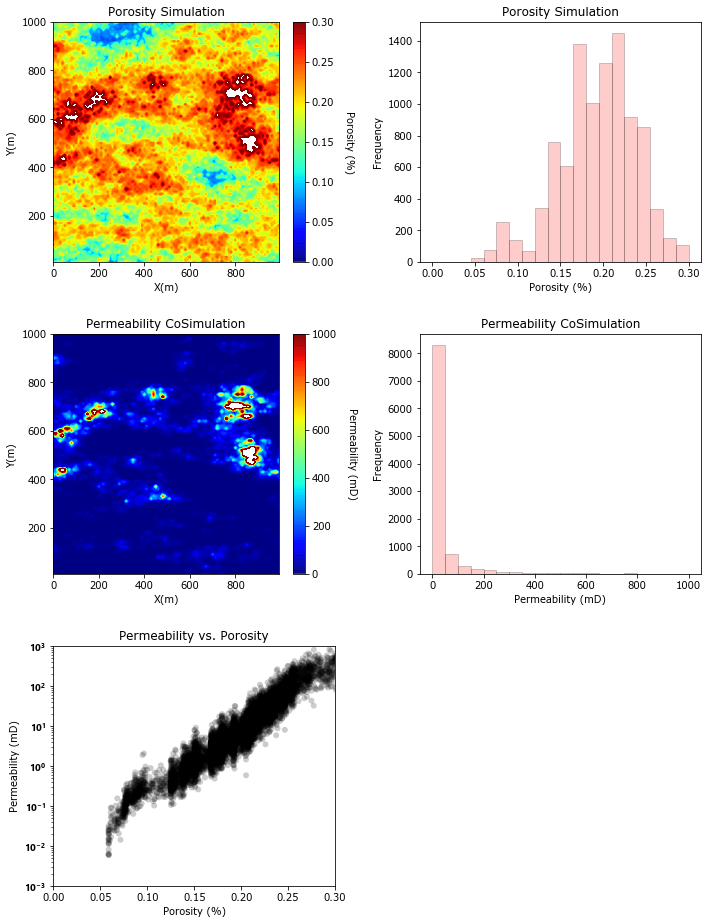

In [15]:
# simulate permeability from porosity 
perm_cmin = 0.0; perm_cmax = 1000
perm_mu = 2.0; perm_sigma = 2.0
correl = 0.9
var_perm = gs.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=90.0,hmaj1=400.0,hmin1=150.0)
cond_perm_sim = gs.cosgsim_uncond(1,nx,ny,cell_size,seed + 5,var_perm,cond_por_sim,correl,"perm_truth.out")
cond_perm_sim = gs.affine(cond_perm_sim,perm_mu,perm_sigma)  
cond_perm_sim = np.exp(cond_perm_sim)

plt.subplot(321)
gs.pixelplt_st(cond_por_sim,xmin,xmax,ymin,ymax,cell_size,por_cmin,por_cmax,"Porosity Simulation","X(m)","Y(m)","Porosity (%)",cmap)

plt.subplot(322)
gs.hist_st(cond_por_sim.flatten(),por_cmin,por_cmax,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (%)",title="Porosity Simulation")

plt.subplot(323)
gs.pixelplt_st(cond_perm_sim,xmin,xmax,ymin,ymax,cell_size,perm_cmin,perm_cmax,"Permeability CoSimulation","X(m)","Y(m)","Permeability (mD)",cmap)

plt.subplot(324)
gs.hist_st(cond_perm_sim.flatten(),perm_cmin,perm_cmax,log=False,cumul=False,bins=20,weights=None,xlabel="Permeability (mD)",title="Permeability CoSimulation")

plt.subplot(325)
plt.scatter(cond_por_sim.flatten(),cond_perm_sim.flatten(), c = "black", marker='o', alpha = 0.2, edgecolors = "none")
plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
plt.title('Permeability vs. Porosity')
plt.ylim(0.001,1000)
plt.yscale('log')
plt.xlim(0,0.3)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=3.0, wspace=0.3, hspace=0.3)
#plt.savefig('F4_Eg_EUR_Real_Pad.tif',dpi=600,bbox_inches="tight")
plt.show()


In [16]:
mat = loadmat('../zones2.mat')


In [17]:
X = mat['X'].T
Y = mat['Y'].T
phi = mat['phi'].T
sw = mat['sw'].T
netpay = mat['np'].T


dataset = pd.DataFrame({'X': X[:, 0], 'Y': Y[:, 0], 'phi': phi[:, 0]})


xmin = min(dataset['X'])
xmax = max(dataset['X'])

ymin = min(dataset['Y'])
ymax = max(dataset['Y'])

por_cmin = min(dataset['phi'])
por_cmax = max(dataset['phi'])

X = X - xmin
Y = Y - ymin


C:\Anaconda3\envs\cs231n\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Anaconda3\envs\cs231n\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


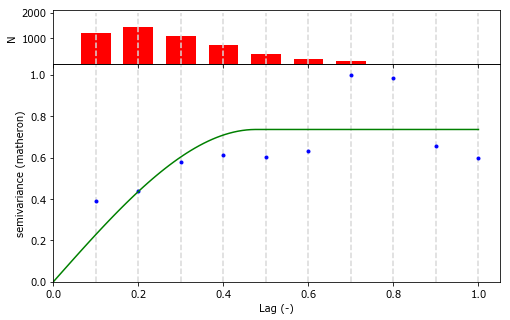

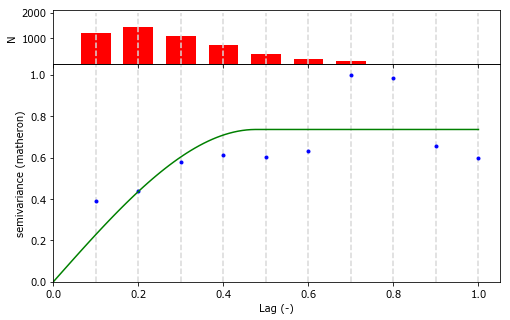

In [35]:
coor = [X, Y]
coor = np.hstack((X, Y))

Phi = phi.reshape(-1)
V = Variogram (coor, Phi)
V.plot()

In [ ]:
# Normal score transform
dataset['NPhi'] = gs.nscore(dataset['phi'].values)
dataset.head()


In [ ]:
plt.subplot(121)
gs.locmap_st(dataset,'X','Y','phi',0,xmax-xmin,0,ymax-ymin,por_cmin,por_cmax,'Porosity Samples','X(m)','Y(m)','Porosity',cmap)

plt.subplot(122)
gs.hist_st(dataset['phi'],por_cmin,por_cmax,log=False,cumul=False,bins=10,weights=None,xlabel="Porosity (%)",title="Porosity Samples")
plt.ylim(0.0,50)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
plt.savefig('PorosityDemo.tif',dpi=600,bbox_inches="tight")
plt.show()

In [ ]:

# Check the porosity normal score transformed distribution
plt.subplot(121)
gs.hist_st(dataset['phi'],por_cmin,por_cmax,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (%)",title="Porosity Samples")
plt.ylim(0.0,20)

plt.subplot(122)
gs.hist_st(dataset['NPhi'],-3,3,log=False,cumul=False,bins=20,weights=None,xlabel="Normal Score Porosity",title="Normal Score Porosity Samples")
plt.ylim(0.0,20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
#plt.savefig('F4_Eg_EUR_Real_Pad.tif',dpi=600,bbox_inches="tight")
plt.show()

In [ ]:
# Calculate sample porosity data isotropic variogram
lag_dist = 500.0; nlag = 10; azi = 0; atol = 90.0; bstand = 1

lag, por_gamma, por_npair = gs.gamv_2d(dataset,"X","Y","NPhi",nlag,lag_dist,azi,atol,bstand)

plt.subplot(121)
plt.plot(lag,por_gamma,'x',color = 'black',label = 'Porosity')
plt.plot([0,5500],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic Standardized Porosity Variogram')
plt.xlim([0,5500])
plt.ylim([0,1.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

In [ ]:
nx = 693
ny = 535
cell_size = 50


# Kriging estimation map
porosity_est,porosity_var = gs.kb2d(dataset,'X','Y','phi',nx,ny,cell_size,var,"Porosity_Krige")
print(porosity_est)
plt.subplot(121)
gs.locpix_st(porosity_est,xmin,xmax,ymin,ymax,cell_size,por_cmin,por_cmax,dataset,'X','Y','phi','Porosity Ordinary Kriging','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(122)
gs.locpix_st(porosity_var,xmin,xmax,ymin,ymax,cell_size,0.0,1.0,dataset,'X','Y','phi','Porosity Ord Kriging Var','X(m)','Y(m)','Porosity Est Var(%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.2)
plt.savefig('PorosityKriged.tif',dpi=600,bbox_inches="tight")
plt.show()